In [1]:
import pymysql
import pandas as pd

db = pymysql.connect(host = 'localhost',user = 'root',password = '123456',db = 'zeddhzm',charset='utf8')   
cur = db.cursor()   
sql = "SELECT * FROM jdcomment_new_2_classified"
cur.execute(sql)
result = cur.fetchall()
df = pd.DataFrame(list(result),columns=['ID','NICKNAME','CONTENT','CONTENT_LENGTH','CREATIONTIME','SCORE','REPLYCOUNT','IMAGESTATUS','IMAGECOUNT','USEFULVOTECOUNT','date','date_now','time_delta','COMPLETENESS','whether_useful'])
cur.close()
db.close()

dff = df.copy()

In [4]:
import jieba

#分词
def separate(sentence):   
    sep_text = jieba.cut(sentence.strip())  
    stopword = stopwords()
    sep_text_str = ''
    for word in sep_text:
        if word not in stopword:
            sep_text_str += word
            sep_text_str += ' '
    return sep_text_str

#加载停用词表
def stopwords():
    stopword = [line.strip() for line in open(r'C:\Users\Zedd\Desktop\stopwords-master\cn_stopwords.txt', encoding='UTF-8').readlines()]  # list类型
    return stopword

In [13]:
df1 = dff[['CONTENT','ID']]

df1['content_cut'] = df1['CONTENT'].apply(separate)

import swifter
df1['content_cut2'] = df1['CONTENT'].swifter.apply(separate)

In [23]:
import numpy as np
df1['bool'] = np.where(df1.content_cut == df1.content_cut2, 1, 0)

D:\Softwares Installed\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
def whether_same(a,b):
    if a==b:
        return 1
    else:
        return 0
    
df1['bool2'] = df1.apply(lambda x: whether_same(x['content_cut'],x['content_cut2']), axis=1)

D:\Softwares Installed\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df1

,CONTENT,ID,content_cut,content_cut2,bool,bool2
0,机器刚到手，就发布降价信息！服了，气管接口粗糙，屏幕连个膜都没有！写的记忆14次，实际10次...,13872879901,机器 刚 到手 发布 降价 信息 服 气管 接口 粗糙 屏幕 连个 膜 没有 写 记忆 14...,机器 刚 到手 发布 降价 信息 服 气管 接口 粗糙 屏幕 连个 膜 没有 写 记忆 14...,1,1
1,你们这是@，知道么。用你们的血压计天天测都是120-130的，80-90的，要不是我去医院拿...,14916170593,这是 @ 知道 血压计 天天 测都 120 - 130 80 - 90 医院 拿药 测 一下...,这是 @ 知道 血压计 天天 测都 120 - 130 80 - 90 医院 拿药 测 一下...,1,1
2,不准，比医院用的高了11,12329148322,不准 医院 高 11,不准 医院 高 11,1,1
3,真的垃圾啊，不到一个月，显示屏就出问题了,12737339981,真的 垃圾 不到 一个月 显示屏 出 问题,真的 垃圾 不到 一个月 显示屏 出 问题,1,1
4,测不注意测不准就这玩意还是算了吧，根本,14050194816,测 注意 测 不准 玩意 算了吧 根本,测 注意 测 不准 玩意 算了吧 根本,1,1
...,...,...,...,...,...,...
15551,速度非常快 老人用着可以 不错,15129903824,速度 非常 快 老人 不错,速度 非常 快 老人 不错,1,1
15552,平台血压计很多，特意选择欧姆龙，大品牌值得信赖！,15129383905,平台 血压计 很多 特意 选择 欧姆龙 品牌 值得 信赖,平台 血压计 很多 特意 选择 欧姆龙 品牌 值得 信赖,1,1
15553,使用起来很不错，值得购买,15128536201,使用 起来 不错 值得 购买,使用 起来 不错 值得 购买,1,1
15554,东西很好用的，体积大了一点，家用型。,15127736953,东西 体积 一点 家用 型,东西 体积 一点 家用 型,1,1


---

**<font size=4 color=blue>35w数据   swifter.apply/apply 的用时比较</font>**
- swifter: 矢量化/dask并行化
-1. 首先，检查apply的函数是否可以向量化，如果可以，就自动使用向量化的计算（最有效果）。
-2. 如果无法进行向量化，那就检查使用Dask进行并行处理或仅使用普通Pandas的apply（仅使用单个内核）哪个更合理。
    <br>并行化并不是一定要用的，因为并行处理的开销会使小型数据集的处理速度变慢，所以这个也需要根据数据集的大小情况具体分析。
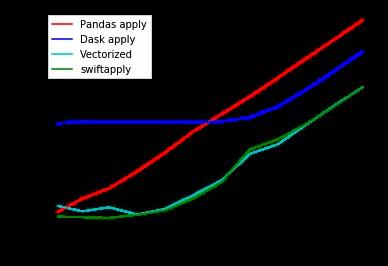
<code>
import pandas as pd
import swifter
df.swifter.apply(...)
</code>

In [2]:
import pandas as pd
df2 = pd.read_excel(r'C:\Users\Zedd\Desktop\微博数据.xlsx')

In [3]:
df2.head()

,username,date,time,reposts,comments,likes,content
0,德州头条,43854,2020年01月24日 00:39,0,0,1,这么恶心的东西为什么要走人喜欢吃？如果真的能吃 老祖宗早就给驯化养殖留着下菜了还至于等到现在...
1,低调期待OK,43854,2020年01月24日 02:32,0,1,0,#江苏新增4例新冠肺炎#拜托疫苗赶紧研究出来吧！真的担心父母这辈老年人，爸爸不听劝，一定要和...
2,综艺胡侃,43854,2020年01月24日 02:57,0,0,0,轻重有别，轻症看似还好。也许感染轻症有助抵御重症，类似疫苗效果。微量病毒也许反而成为特效药。...
3,树莓可乐nn,43854,2020年01月24日 12:21,35,53,217,#关注新冠肺炎#【国资委：涉医药央企积极开展新型冠状病毒抗血清和疫苗研制】24日，据国资委官...
4,人间会员,43854,2020年01月24日 12:27,2,3,11,#关注新冠肺炎#【国资委：涉医药央企积极开展新型冠状病毒抗血清和疫苗研制】24日，据国资委官...


In [ ]:
# apply  用时 1h
df2['content_cut'] = df2.content.apply(separate)

In [6]:
import swifter

In [7]:
df2['content_cut2'] = df2.content.swifter.apply(separate)

Pandas Apply:   0%|          | 0/368628 [00:00<?, ?it/s]

In [8]:
df2

,username,date,time,reposts,comments,likes,content,content_cut2
0,德州头条,43854,2020年01月24日 00:39,0,0,1,这么恶心的东西为什么要走人喜欢吃？如果真的能吃 老祖宗早就给驯化养殖留着下菜了还至于等到现在...,恶心 东西 走 喜欢 吃 真的 吃 老祖宗 早就 驯化 养殖 留着 菜 现在 美名 野味...
1,低调期待OK,43854,2020年01月24日 02:32,0,1,0,#江苏新增4例新冠肺炎#拜托疫苗赶紧研究出来吧！真的担心父母这辈老年人，爸爸不听劝，一定要和...,# 江苏 新增 例新冠 肺炎 # 拜托 疫苗 赶紧 研究 真的 担心 父母 这辈 老年人 爸...
2,综艺胡侃,43854,2020年01月24日 02:57,0,0,0,轻重有别，轻症看似还好。也许感染轻症有助抵御重症，类似疫苗效果。微量病毒也许反而成为特效药。...,轻重 有别 轻症 看似 还好 也许 感染 轻症 有助 抵御 重症 类似 疫苗 效果 微量 病...
3,树莓可乐nn,43854,2020年01月24日 12:21,35,53,217,#关注新冠肺炎#【国资委：涉医药央企积极开展新型冠状病毒抗血清和疫苗研制】24日，据国资委官...,# 关注 新冠 肺炎 # 【 国资委 涉 医药 央企 积极开展 新型 冠状病毒 抗血清 疫苗...
4,人间会员,43854,2020年01月24日 12:27,2,3,11,#关注新冠肺炎#【国资委：涉医药央企积极开展新型冠状病毒抗血清和疫苗研制】24日，据国资委官...,# 关注 新冠 肺炎 # 【 国资委 涉 医药 央企 积极开展 新型 冠状病毒 抗血清 疫苗...
...,...,...,...,...,...,...,...,...
368623,UMZK小爽,44219,2021年01月23日 23:55,0,0,0,中国新冠疫苗助力多国抗疫 中国新冠疫苗助力多国抗疫 ​,中国 新冠 疫苗 助力 多国 抗疫 中国 新冠 疫苗 助力 多国 抗疫 ​
368624,冬眠小盐,44219,2021年01月23日 23:56,0,0,0,中国新冠疫苗助力多国抗疫 中国新冠疫苗助力多国抗疫 ​,中国 新冠 疫苗 助力 多国 抗疫 中国 新冠 疫苗 助力 多国 抗疫 ​
368625,五颗不死的梅子,44219,2021年01月23日 23:58,0,0,0,【河北香河加班加点为新型冠状病毒疫苗生产助力】#河北爆料# 连日来，香河县人民基业电气设备有...,【 河北 香河 加班加点 新型 冠状病毒 疫苗 生产 助力 】 # 河北 爆料 # 连日...
368626,搞笑三好生,44219,2021年01月23日 23:59,0,0,1,不管发生什么事情，都要对自己说“不要紧的”，因为一个人积极乐观的态度是解决和战胜任何困难的第...,发生 事情 说 不要紧 一个 积极 乐观 态度 解决 战胜 困难 第一步 — — 20181...


In [4]:
dff.head()

,ID,NICKNAME,CONTENT,CONTENT_LENGTH,CREATIONTIME,SCORE,REPLYCOUNT,IMAGESTATUS,IMAGECOUNT,USEFULVOTECOUNT,date,date_now,time_delta,COMPLETENESS,whether_useful
0,13872879901,j***5,机器刚到手，就发布降价信息！服了，气管接口粗糙，屏幕连个膜都没有！写的记忆14次，实际10次...,56,2020-03-04 18:21:47,1,14,1,2,47,2020-03-04,2021-01-24,326,4,1
1,14916170593,海***行,你们这是@，知道么。用你们的血压计天天测都是120-130的，80-90的，要不是我去医院拿...,92,2020-11-16 21:01:30,1,10,0,0,10,2020-11-16,2021-01-24,69,2,1
2,12329148322,布***咔,不准，比医院用的高了11,12,2019-01-02 14:39:18,1,17,1,1,30,2019-01-02,2021-01-24,753,1,1
3,12737339981,j***z,真的垃圾啊，不到一个月，显示屏就出问题了,20,2019-05-07 21:49:36,1,10,0,0,39,2019-05-07,2021-01-24,628,1,1
4,14050194816,心***福,测不注意测不准就这玩意还是算了吧，根本,19,2020-04-18 20:29:44,1,23,0,0,66,2020-04-18,2021-01-24,281,0,1


---
**<font size=4 color=blue>pd.style + 链式法则</font>**

In [17]:
dff3 = dff.drop('CONTENT', axis=1).iloc[:10,:]
dff3

,ID,NICKNAME,CONTENT_LENGTH,CREATIONTIME,SCORE,REPLYCOUNT,IMAGESTATUS,IMAGECOUNT,USEFULVOTECOUNT,date,date_now,time_delta,COMPLETENESS,whether_useful
0,13872879901,j***5,56,2020-03-04 18:21:47,1,14,1,2,47,2020-03-04,2021-01-24,326,4,1
1,14916170593,海***行,92,2020-11-16 21:01:30,1,10,0,0,10,2020-11-16,2021-01-24,69,2,1
2,12329148322,布***咔,12,2019-01-02 14:39:18,1,17,1,1,30,2019-01-02,2021-01-24,753,1,1
3,12737339981,j***z,20,2019-05-07 21:49:36,1,10,0,0,39,2019-05-07,2021-01-24,628,1,1
4,14050194816,心***福,19,2020-04-18 20:29:44,1,23,0,0,66,2020-04-18,2021-01-24,281,0,1
5,12848110309,z***0,318,2019-06-05 11:11:06,1,19,1,5,78,2019-06-05,2021-01-24,599,20,1
6,13911880336,H***G,9,2020-03-13 21:27:39,1,2,1,1,7,2020-03-13,2021-01-24,317,1,1
7,11149543419,j***s,129,2018-01-11 15:03:22,1,142,1,8,428,2018-01-11,2021-01-24,1109,7,1
8,12212756843,j***6,348,2018-12-02 20:16:00,1,6,1,4,38,2018-12-02,2021-01-24,784,19,1
9,14467608719,j***v,21,2020-07-28 13:00:41,1,3,0,0,8,2020-07-28,2021-01-24,180,1,1


In [21]:
dff3.style.bar('CONTENT_LENGTH', vmin=0, color='#d65f5f')
dff3.style.background_gradient('Greens', subset='USEFULVOTECOUNT')
dff3.style.highlight_null()
dff3.style.highlight_max(axis=1)

,ID,NICKNAME,CONTENT_LENGTH,CREATIONTIME,SCORE,REPLYCOUNT,IMAGESTATUS,IMAGECOUNT,USEFULVOTECOUNT,date,date_now,time_delta,COMPLETENESS,whether_useful
0,13872879901,j***5,56,2020-03-04 18:21:47,1,14,1,2,47,2020-03-04,2021-01-24,326,4,1
1,14916170593,海***行,92,2020-11-16 21:01:30,1,10,0,0,10,2020-11-16,2021-01-24,69,2,1
2,12329148322,布***咔,12,2019-01-02 14:39:18,1,17,1,1,30,2019-01-02,2021-01-24,753,1,1
3,12737339981,j***z,20,2019-05-07 21:49:36,1,10,0,0,39,2019-05-07,2021-01-24,628,1,1
4,14050194816,心***福,19,2020-04-18 20:29:44,1,23,0,0,66,2020-04-18,2021-01-24,281,0,1
5,12848110309,z***0,318,2019-06-05 11:11:06,1,19,1,5,78,2019-06-05,2021-01-24,599,20,1
6,13911880336,H***G,9,2020-03-13 21:27:39,1,2,1,1,7,2020-03-13,2021-01-24,317,1,1
7,11149543419,j***s,129,2018-01-11 15:03:22,1,142,1,8,428,2018-01-11,2021-01-24,1109,7,1
8,12212756843,j***6,348,2018-12-02 20:16:00,1,6,1,4,38,2018-12-02,2021-01-24,784,19,1
9,14467608719,j***v,21,2020-07-28 13:00:41,1,3,0,0,8,2020-07-28,2021-01-24,180,1,1


In [30]:
dff3.style.bar('CONTENT_LENGTH', vmin=0).background_gradient('Greens', subset='USEFULVOTECOUNT').highlight_null()  #.to_excel('./styled.xlsx', engine='openpyxl')

,ID,NICKNAME,CONTENT_LENGTH,CREATIONTIME,SCORE,REPLYCOUNT,IMAGESTATUS,IMAGECOUNT,USEFULVOTECOUNT,date,date_now,time_delta,COMPLETENESS,whether_useful
0,13872879901,j***5,56,2020-03-04 18:21:47,1,14,1,2,47,2020-03-04,2021-01-24,326,4,1
1,14916170593,海***行,92,2020-11-16 21:01:30,1,10,0,0,10,2020-11-16,2021-01-24,69,2,1
2,12329148322,布***咔,12,2019-01-02 14:39:18,1,17,1,1,30,2019-01-02,2021-01-24,753,1,1
3,12737339981,j***z,20,2019-05-07 21:49:36,1,10,0,0,39,2019-05-07,2021-01-24,628,1,1
4,14050194816,心***福,19,2020-04-18 20:29:44,1,23,0,0,66,2020-04-18,2021-01-24,281,0,1
5,12848110309,z***0,318,2019-06-05 11:11:06,1,19,1,5,78,2019-06-05,2021-01-24,599,20,1
6,13911880336,H***G,9,2020-03-13 21:27:39,1,2,1,1,7,2020-03-13,2021-01-24,317,1,1
7,11149543419,j***s,129,2018-01-11 15:03:22,1,142,1,8,428,2018-01-11,2021-01-24,1109,7,1
8,12212756843,j***6,348,2018-12-02 20:16:00,1,6,1,4,38,2018-12-02,2021-01-24,784,19,1
9,14467608719,j***v,21,2020-07-28 13:00:41,1,3,0,0,8,2020-07-28,2021-01-24,180,1,1


In [20]:
dff3

,ID,NICKNAME,CONTENT_LENGTH,CREATIONTIME,SCORE,REPLYCOUNT,IMAGESTATUS,IMAGECOUNT,USEFULVOTECOUNT,date,date_now,time_delta,COMPLETENESS,whether_useful
0,13872879901,j***5,56,2020-03-04 18:21:47,1,14,1,2,47,2020-03-04,2021-01-24,326,4,1
1,14916170593,海***行,92,2020-11-16 21:01:30,1,10,0,0,10,2020-11-16,2021-01-24,69,2,1
2,12329148322,布***咔,12,2019-01-02 14:39:18,1,17,1,1,30,2019-01-02,2021-01-24,753,1,1
3,12737339981,j***z,20,2019-05-07 21:49:36,1,10,0,0,39,2019-05-07,2021-01-24,628,1,1
4,14050194816,心***福,19,2020-04-18 20:29:44,1,23,0,0,66,2020-04-18,2021-01-24,281,0,1
5,12848110309,z***0,318,2019-06-05 11:11:06,1,19,1,5,78,2019-06-05,2021-01-24,599,20,1
6,13911880336,H***G,9,2020-03-13 21:27:39,1,2,1,1,7,2020-03-13,2021-01-24,317,1,1
7,11149543419,j***s,129,2018-01-11 15:03:22,1,142,1,8,428,2018-01-11,2021-01-24,1109,7,1
8,12212756843,j***6,348,2018-12-02 20:16:00,1,6,1,4,38,2018-12-02,2021-01-24,784,19,1
9,14467608719,j***v,21,2020-07-28 13:00:41,1,3,0,0,8,2020-07-28,2021-01-24,180,1,1
